# Customer Segmentation using Clustering Algorithms

## Why Customer Segmentation?
Customer segmentation groups customers with similar characteristics, enabling businesses to:
- **Targeted Marketing** - Tailor campaigns to specific customer groups
- **Resource Optimization** - Focus efforts on high-value segments
- **Personalization** - Customize products and services to meet customer preference
- **Customer Retention** - Identify at-risk customers to prevent churn through targeted interventions
- **Revenue Growth** - Maximize ROI through better targeting and campaigns

## Overview
This notebook performs customer segmentation using three clustering algorithms:
- **K-Means Clustering** - Partition-based clustering
- **Hierarchical Clustering (HAC)** - Tree-based clustering  
- **Gaussian Mixture Models (GMM) Clustering** - probabilistic model 

## Objectives
1. Load and explore customer data
2. Preprocess and clean data
3. Apply multiple clustering algorithms
4. Compare algorithm performance
5. Extract business insights from customer segments

## Notebook Structure
1. **Setup & Imports** - Load libraries
2. **Data Loading** - Read and validate CSV
3. **Data Exploration** - Understand the data
4. **Data Preprocessing** - Clean and prepare data
5. **Feature Selection** - Choose clustering features
6. **K-Means Clustering** - Implement and evaluate
7. **Hierarchical Clustering** - Implement and evaluate
8. **CMM Clustering** - Implement and evaluate
9. **Model Comparison** - Compare all algorithms
10. **Cluster Analysis** - Interpret segments
11. **Business Insights** - Actionable recommendations
12. **Export Results** - Save outputs

---

A targeted EDA approach was applied, limited to distribution checks, missing-value inspection, and outlier detection using the IQR method. Advanced exploratory visualisations (such as heatmaps, and multivariate relationship plots) were intentionally omitted from this notebook to maintain a streamlined workflow focused on clustering. However, these extended EDA visualisations are available on the live dashboard for users who wish to explore deeper patterns in the data.

---

In [1]:
# Setup & Library Imports
# Loading all required libraries for data manipulation, visualization, and clustering

# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Dimensionality reduction
from sklearn.decomposition import PCA

# System
import os

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# Load data
df = pd.read_csv('../data/customer_segmentation.csv')

print(f"✅ Data loaded successfully!")
print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Data loaded successfully!
📊 Shape: 2240 rows × 29 columns


In [3]:
# Display first few rows
print("First 5 rows:")
display(df.head())

print("\n" + "="*50)
print("\nData Types:")
print(df.dtypes)

print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())

print("\n" + "="*50)
print("\nBasic Statistics:")
display(df.describe())

First 5 rows:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0




Data Types:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


Missing Values:
ID                      0
Year_Birth              0
Edu

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Comment:** Income has 24 missing values so we fix that by using the median. The median is the middle value in a sorted dataset, making it resistant to extreme values or outliers. For income data, we use the **median** instead of the **mean** because a few very high earners can artificially inflate the average, misrepresenting typical customer income. By filling the 24 missing income values with the median, we ensure each customer has a realistic income estimate based on the central tendency of the dataset, without being skewed by outliers. This approach preserves data integrity and prevents clustering algorithms from being biased by missing or unrealistic values.

In [4]:
# Handle missing Income values with median
print(f"Missing Income values: {df['Income'].isnull().sum()}")

# Fill with median
df['Income'].fillna(df['Income'].median(), inplace=True)

print(f"After filling: {df['Income'].isnull().sum()}")
print("✅ Missing values handled")

Missing Income values: 24
After filling: 0
✅ Missing values handled


## Feature Engineering

Create new variables from existing data to better capture patterns and relationships for analysis. In this case, we're transforming raw data into more meaningful features: 

- converting birth year into age for easier interpretation
- combining multiple spending categories into total spending to measure overall customer value
- summing all purchase channels to understand buying frequency
- combining kids and teens into total children to assess household size.

These engineered features provide clearer insights for clustering algorithms by representing customer behaviour in more intuitive and aggregated ways.

In [5]:
# Create Age from Year_Birth
current_year = 2025
df['Age'] = current_year - df['Year_Birth']

# Create Total_Spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Create Total_Purchases
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 
                 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Create Total_Children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Show the new features with actual data
print("Sample Featured Data:")
new_features = ['Age', 'Total_Spending', 'Total_Purchases', 'Total_Children']
display(df[new_features].head(10))

print(f"\nDataset now has 4 additional columns after feature engineering (Total: {df.shape[1]} columns)")

Sample Featured Data:


,Age,Total_Spending,Total_Purchases,Total_Children
0,68,1617,25,0
1,71,27,6,2
2,60,776,21,0
3,41,53,8,1
4,44,422,19,1
5,58,716,22,1
6,54,590,21,1
7,40,169,10,1
8,51,46,6,1
9,75,49,2,2



Dataset now has 4 additional columns after feature engineering (Total: 33 columns)


## Outlier detection

In [6]:
# Outlier Detection for all continuous numeric variables
# Identify continuous numeric features (exclude binary/campaign columns)
continuous_features = ['Age', 'Income', 'Total_Children', 'Total_Spending', 
                       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                       'MntSweetProducts', 'MntGoldProds', 'Total_Purchases', 
                       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                       'NumStorePurchases', 'Recency', 'NumWebVisitsMonth']

print("="*60)
print("OUTLIER DETECTION (IQR Method)")
print("="*60)

outlier_summary = []
outlier_mask = pd.DataFrame(False, index=df.index, columns=continuous_features)

for feature in continuous_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mark outliers for this feature
    outlier_mask[feature] = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    outlier_count = outlier_mask[feature].sum()
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': feature,
        'Outliers': outlier_count,
        'Percentage': outlier_pct
    })
    
    print(f"\n{feature}:")
    print(f"  Outliers: {outlier_count} ({outlier_pct:.2f}%)")
    print(f"  Range: [{df[feature].min():.2f}, {df[feature].max():.2f}]")
    print(f"  IQR Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Summary
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
outlier_df = pd.DataFrame(outlier_summary).sort_values('Outliers', ascending=False)
display(outlier_df)

# Correct count of rows with at least one outlier
total_rows_with_outliers = outlier_mask.any(axis=1).sum()
print(f"\nTotal rows with at least one outlier: {total_rows_with_outliers} ({total_rows_with_outliers/len(df)*100:.2f}%)")

OUTLIER DETECTION (IQR Method)

Age:
  Outliers: 3 (0.13%)
  Range: [29.00, 132.00]
  IQR Bounds: [21.00, 93.00]

Income:
  Outliers: 8 (0.36%)
  Range: [1730.00, 666666.00]
  IQR Bounds: [-13587.75, 117416.25]

Total_Children:
  Outliers: 53 (2.37%)
  Range: [0.00, 3.00]
  IQR Bounds: [-1.50, 2.50]

Total_Spending:
  Outliers: 3 (0.13%)
  Range: [5.00, 2525.00]
  IQR Bounds: [-1396.38, 2510.62]

MntWines:
  Outliers: 35 (1.56%)
  Range: [0.00, 1493.00]
  IQR Bounds: [-697.00, 1225.00]

MntFruits:
  Outliers: 227 (10.13%)
  Range: [0.00, 199.00]
  IQR Bounds: [-47.00, 81.00]

MntMeatProducts:
  Outliers: 175 (7.81%)
  Range: [0.00, 1725.00]
  IQR Bounds: [-308.00, 556.00]

MntFishProducts:
  Outliers: 223 (9.96%)
  Range: [0.00, 259.00]
  IQR Bounds: [-67.50, 120.50]

MntSweetProducts:
  Outliers: 248 (11.07%)
  Range: [0.00, 263.00]
  IQR Bounds: [-47.00, 81.00]

MntGoldProds:
  Outliers: 207 (9.24%)
  Range: [0.00, 362.00]
  IQR Bounds: [-61.50, 126.50]

Total_Purchases:
  Outliers: 

,Feature,Outliers,Percentage
8,MntSweetProducts,248,11.071429
5,MntFruits,227,10.133929
7,MntFishProducts,223,9.955357
9,MntGoldProds,207,9.241071
6,MntMeatProducts,175,7.812500
11,NumDealsPurchases,86,3.839286
2,Total_Children,53,2.366071
4,MntWines,35,1.562500
13,NumCatalogPurchases,23,1.026786
16,NumWebVisitsMonth,8,0.357143



Total rows with at least one outlier: 745 (33.26%)


In [7]:
# Check the 8 income outliers
income_outliers = df[df['Income'] > 117416.25]['Income'].sort_values(ascending=False)
print("Income outliers:")
print(income_outliers.values)

# Check the 3 age outliers
age_outliers = df[df['Age'] > 92][['Age', 'Year_Birth']].sort_values('Age', ascending=False)
print("Age outliers:")
display(age_outliers)

Income outliers:
[666666. 162397. 160803. 157733. 157243. 157146. 156924. 153924.]
Age outliers:


,Age,Year_Birth
239,132,1893
339,126,1899
192,125,1900


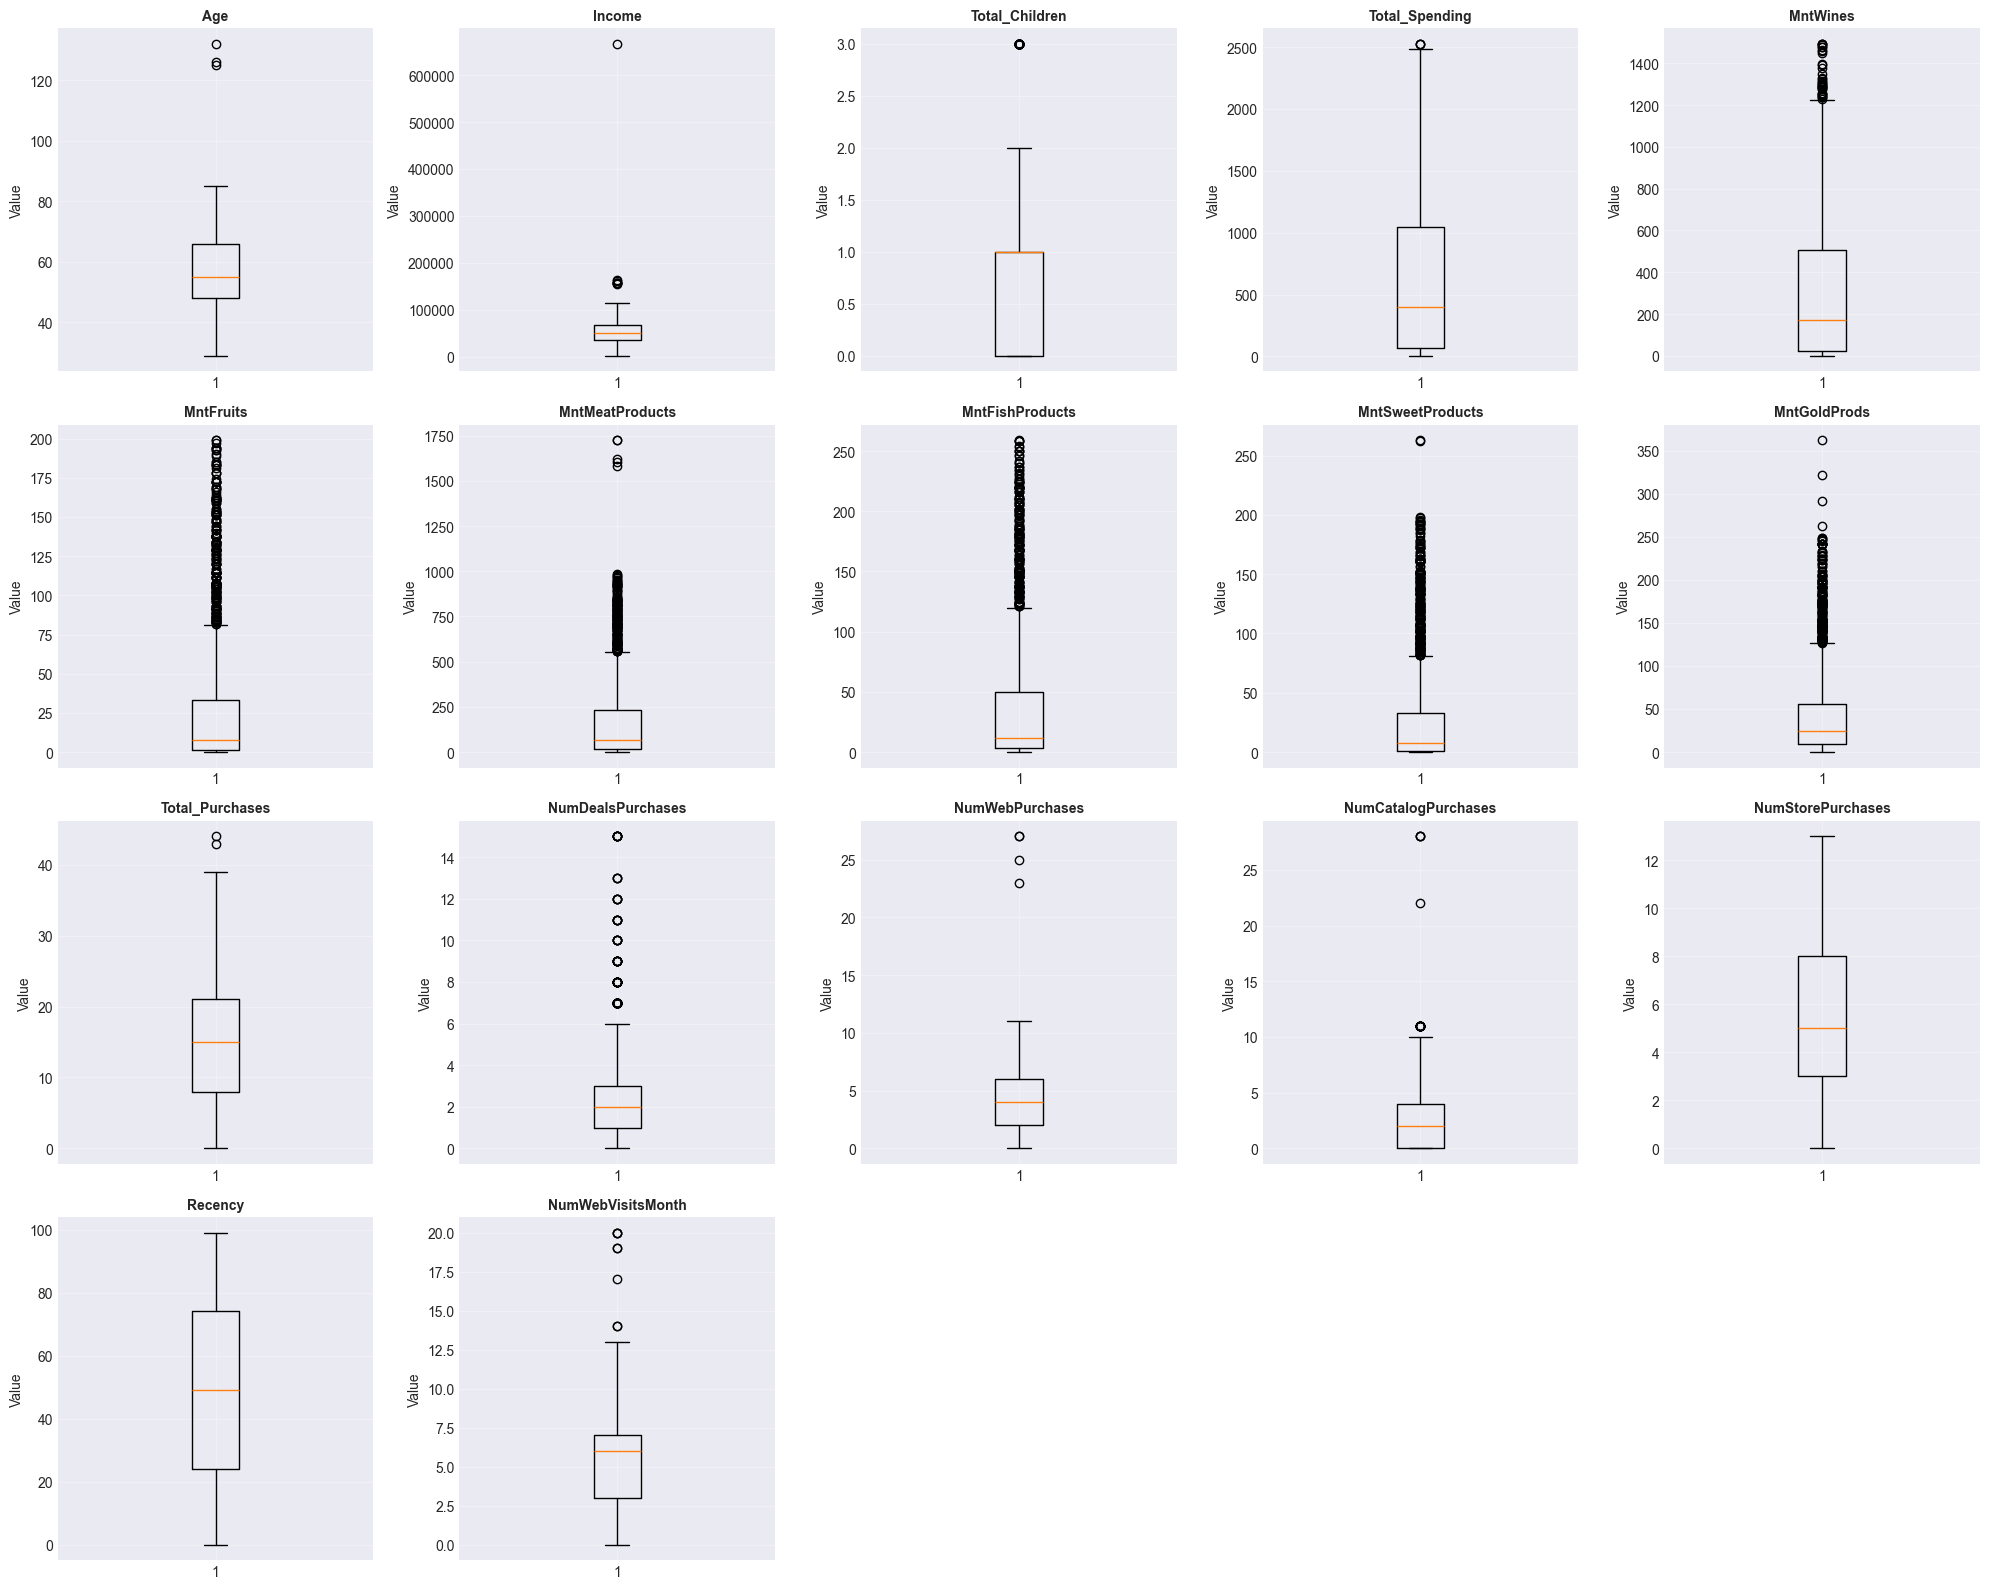


✅ Boxplot saved to images/outliers_boxplot.png


In [8]:
# Visualize outliers with boxplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    axes[idx].boxplot(df[feature])
    axes[idx].set_title(feature, fontweight='bold', fontsize=10)
    axes[idx].set_ylabel('Value')
    axes[idx].grid(alpha=0.3)

# Hide extra subplots
for idx in range(len(continuous_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../images/outliers_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Boxplot saved to images/outliers_boxplot.png")

## Outlier Analysis and Treatment
### Overview
Using the IQR (Interquartile Range) method, we identified outliers across 17 continuous features. Approximately 33% of rows contained at least one outlier, which is typical for retail customer datasets due to natural variation in purchasing behavior.

### Spending Outliers (Retained)
The highest outlier percentages were found in spending categories:
- MntSweetProducts: 11%
- MntFruits: 10%
- MntFishProducts: 10%
- MntGoldProds: 9%
- MntMeatProducts: 8%

These outliers represent legitimate customer behaviour in FMCG/retail contexts. Spending variables are naturally right-skewed, with a small segment of high-value customers spending significantly more than average. Removing these outliers would eliminate meaningful customer segments (VIP/premium customers) that are valuable for business insights. Therefore, **all spending outliers were retained**.

### Age Outliers (Removed)
Three age values exceeded 100 years (ranging from 120-131 years), representing only 0.13% of the data. These are clear data entry errors and were removed to prevent distortion in clustering algorithms. After removal, the age range is 29-85 years, which reflects realistic customer demographics.

### Income Outliers (Removed)
Eight income outliers were identified above \\$117,416.25. The most extreme value was \\$666,666 (a known placeholder for missing/corrupted data). The remaining outliers ranged from \\$150,000 to \\$162,000, which fall far outside the typical income distribution of this dataset.

**Rationale for removal:**
- The dataset's typical income range is \\$35,000 to \\$68,000 (IQR), with most values between \\$5,000 to \\$120,000
- The presence of the corrupted \\$666,666 value indicates broader data quality issues
- Income values of \\$150k-\\$162k show a suspicious gap from the main distribution, suggesting data entry errors rather than genuine high earners
- If these were real high-income customers, we would expect a gradual distribution rather than a sudden jump from \\$120k to \\$150k+


In [9]:
# Remove all income outliers
print(f"Before: {len(df)} rows")

# Remove Age > 100
df = df[df['Age'] <= 100]

# Remove all income outliers (>$117,416.25)
df = df[df['Income'] <= 117416.25]

print(f"After: {len(df)} rows")
print(f"Removed: {2240 - len(df)} rows total")
print(f"\nNew age range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"New income range: ${df['Income'].min():,.2f} - ${df['Income'].max():,.2f}")

Before: 2240 rows
After: 2229 rows
Removed: 11 rows total

New age range: 29 - 85 years
New income range: $1,730.00 - $113,734.00


After outlier removal, the dataset contains realistic income values ranging from \\$1,730 to \\$113,734, preserving data integrity for reliable clustering results.

### Final Dataset
- **Before outlier removal:** 2,240 rows
- **After outlier removal:** 2,229 rows
- **Rows removed:** 11 (data quality errors only)
- **Spending outliers retained:** Yes (legitimate customer segments)

## Select Features for Clustering

**NOTE:** Before selecting features for clustering, we have to encode categorical features first (label encoding).

## Lable Encoding

We convert categorical text data (Education and Marital_Status) into numeric values because clustering algorithms only work with numbers. Label encoding assigns each unique category a number: for example, "Bachelor" might become 0, "Master" becomes 1, "PhD" becomes 2, etc. This transformation preserves the information while making it usable for mathematical calculations in clustering algorithms.

In [10]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Education encoding
le_education = LabelEncoder()
df['Education_Encoded'] = le_education.fit_transform(df['Education'])

# Marital_Status encoding
le_marital = LabelEncoder()
df['Marital_Status_Encoded'] = le_marital.fit_transform(df['Marital_Status'])

print("Categorical Encoding:")
print(f"\nEducation categories: {list(le_education.classes_)}")
print(f"Marital Status categories: {list(le_marital.classes_)}")

# Show sample of encoded data
print("\nSample Encoded Data:")
display(df[['Education', 'Education_Encoded', 'Marital_Status', 'Marital_Status_Encoded']].head(10))

print(f"\n✅ Categorical variables encoded")

Categorical Encoding:

Education categories: ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
Marital Status categories: ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']

Sample Encoded Data:


,Education,Education_Encoded,Marital_Status,Marital_Status_Encoded
0,Graduation,2,Single,4
1,Graduation,2,Single,4
2,Graduation,2,Together,5
3,Graduation,2,Together,5
4,PhD,4,Married,3
5,Master,3,Together,5
6,Graduation,2,Divorced,2
7,PhD,4,Married,3
8,PhD,4,Together,5
9,PhD,4,Together,5



✅ Categorical variables encoded


## Now we select features for clustering

In [11]:
# Select all features for clustering
clustering_features = [
    # Demographics
    'Age', 'Income', 'Total_Children', 'Education_Encoded', 'Marital_Status_Encoded',
    
    # Spending behavior
    'Total_Spending', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    
    # Purchase behavior
    'Total_Purchases', 'NumDealsPurchases', 'NumWebPurchases', 
    'NumCatalogPurchases', 'NumStorePurchases',
    
    # Engagement
    'Recency', 'NumWebVisitsMonth',
    
    # Campaign responses
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
    'AcceptedCmp5', 'Response', 'Complain'
]

# Create clustering dataset
df_cluster = df[clustering_features].copy()

print(f"Selected {len(clustering_features)} features for clustering:")
print(clustering_features)
print(f"\nClustering dataset shape: {df_cluster.shape}")
print("\nSample data:")
display(df_cluster.head())

Selected 26 features for clustering:
['Age', 'Income', 'Total_Children', 'Education_Encoded', 'Marital_Status_Encoded', 'Total_Spending', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Purchases', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']

Clustering dataset shape: (2229, 26)

Sample data:


,Age,Income,Total_Children,Education_Encoded,Marital_Status_Encoded,Total_Spending,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,68,58138.0,0,2,4,1617,635,88,546,172,88,88,25,3,8,10,4,58,7,0,0,0,0,0,1,0
1,71,46344.0,2,2,4,27,11,1,6,2,1,6,6,2,1,1,2,38,5,0,0,0,0,0,0,0
2,60,71613.0,0,2,5,776,426,49,127,111,21,42,21,1,8,2,10,26,4,0,0,0,0,0,0,0
3,41,26646.0,1,2,5,53,11,4,20,10,3,5,8,2,2,0,4,26,6,0,0,0,0,0,0,0
4,44,58293.0,1,4,3,422,173,43,118,46,27,15,19,5,5,3,6,94,5,0,0,0,0,0,0,0


In [12]:
# Scale features (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=clustering_features)

print("Feature Scaling (Standardization):")
print(f"Scaled data shape: {df_scaled.shape}")
print("\nBefore scaling - sample statistics:")
display(df_cluster.describe().iloc[:2])  # mean and std
print("\nAfter scaling - sample statistics:")
display(df_scaled.describe().iloc[:2])  # mean ~0, std ~1

Feature Scaling (Standardization):
Scaled data shape: (2229, 26)

Before scaling - sample statistics:


,Age,Income,Total_Children,Education_Encoded,Marital_Status_Encoded,Total_Spending,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.00000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,56.111261,51619.504262,0.951996,2.392553,3.729475,605.54105,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,14.869,2.319874,4.100045,2.636608,5.812472,49.106326,5.334231,0.064603,0.013459,0.073127,0.074921,0.072678,0.149843,0.008973



After scaling - sample statistics:


,Age,Income,Total_Children,Education_Encoded,Marital_Status_Encoded,Total_Spending,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
count,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03
mean,2.151711e-16,7.969299e-18,4.462808e-17,2.072018e-16,-7.969299e-18,1.115702e-17,-4.701887e-17,5.578510e-18,1.593860e-18,-6.534826e-17,-9.563159e-18,1.912632e-17,1.179456e-16,-9.244387e-17,-7.331755e-17,5.100352e-17,-6.176207e-17,-6.694212e-17,-9.563159e-18,-1.115702e-17,6.375440e-18,1.514167e-17,-2.868948e-17,2.709562e-17,8.766229e-17,1.753246e-17


In [13]:
# Verify outlier removal worked
print("Verification after outlier removal:")
print(f"\nAge range in df: {df['Age'].min()} - {df['Age'].max()} years")
print(f"Income range in df: ${df['Income'].min():,.2f} - ${df['Income'].max():,.2f}")

# Check df_cluster too too
if 'df_cluster' in locals():
    print(f"\nAge in df_cluster: {df_cluster['Age'].min()} - {df_cluster['Age'].max()}")
    print(f"Income in df_cluster: ${df_cluster['Income'].min():,.2f} - ${df_cluster['Income'].max():,.2f}")
    
# Check df_scaled (the scaled version)
if 'df_scaled' in locals():
    age_idx = clustering_features.index('Age')
    income_idx = clustering_features.index('Income')
    print(f"\nScaled Age range: {df_scaled.iloc[:, age_idx].min():.2f} - {df_scaled.iloc[:, age_idx].max():.2f}")
    print(f"Scaled Income range: {df_scaled.iloc[:, income_idx].min():.2f} - {df_scaled.iloc[:, income_idx].max():.2f}")

Verification after outlier removal:

Age range in df: 29 - 85 years
Income range in df: $1,730.00 - $113,734.00

Age in df_cluster: 29 - 85
Income in df_cluster: $1,730.00 - $113,734.00

Scaled Age range: -2.32 - 2.47
Scaled Income range: -2.42 - 3.02


# Clustering Algorithm

## K-Means Elbow Method 

Calculating optimal K...
K=2: Inertia=43428.04, Silhouette=0.275
K=3: Inertia=39587.47, Silhouette=0.196
K=4: Inertia=36983.38, Silhouette=0.192
K=5: Inertia=34885.99, Silhouette=0.202
K=6: Inertia=33841.89, Silhouette=0.175
K=7: Inertia=31822.24, Silhouette=0.178
K=8: Inertia=30996.21, Silhouette=0.187
K=9: Inertia=29814.86, Silhouette=0.113
K=10: Inertia=28696.27, Silhouette=0.101

🎯 Optimal K based on Silhouette Score: 2


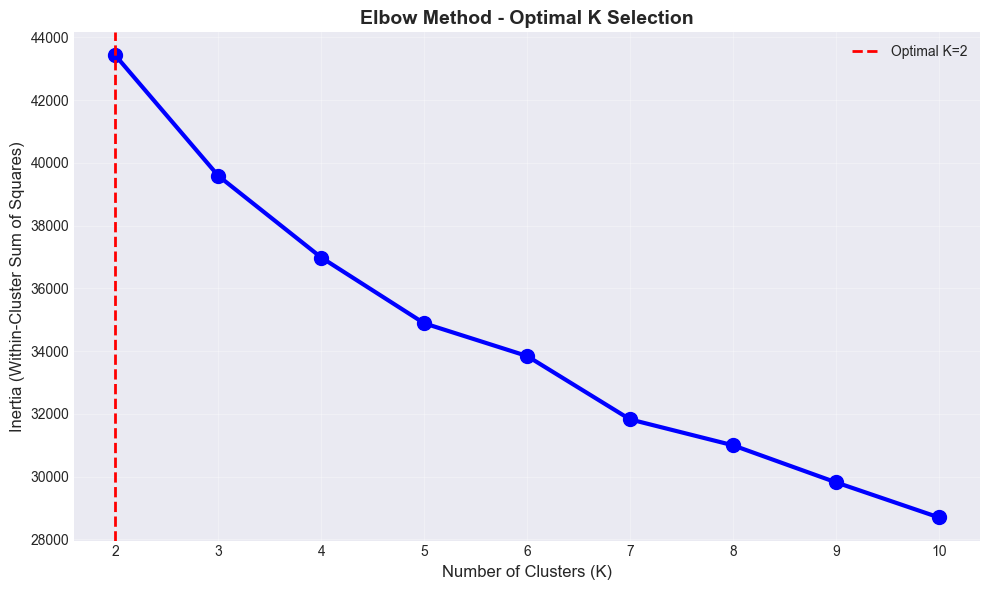


✅ Static plot saved to images/elbow_curve.png


In [14]:
# Elbow Method with automatic optimal K detection
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
k_range = range(2, 11)

print("Calculating optimal K...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")

# Find optimal K (highest silhouette score)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n🎯 Optimal K based on Silhouette Score: {optimal_k}")

# Create plot with Matplotlib (for GitHub)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linewidth=3, markersize=10, color='blue')
plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k}')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method - Optimal K Selection', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.xticks(k_range)
plt.legend()
plt.tight_layout()
plt.savefig('../images/elbow_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Static plot saved to images/elbow_curve.png")

## Optimal Number of Clusters (K) Selection

To determine the optimal number of clusters for customer segmentation, both the Elbow Method (Inertia) and Silhouette Score were evaluated across K=2 to K=10.

### Results
- **Elbow Method (Inertia)**: The plot shows a clear "elbow bend" at K=3, where the rate of inertia decrease significantly slows, indicating diminishing returns beyond three clusters.
- **Silhouette Score**: K=2 achieved the highest score (0.275), while K=3 scored 0.196, still indicating reasonably well-separated clusters.

### Interpretation
- K=2 provides the most distinct separation but offers limited granularity for business insights.
- K=3 balances cluster separation with practical segmentation, capturing more variation in customer behavior.

### Decision
**K=3 was selected** as the optimal number of clusters. While K=2 has slightly better separation metrics, K=3 offers more actionable customer segments for targeted marketing strategies (e.g., low-value, medium-value, high-value customers) while maintaining reasonable cluster quality.

In [15]:
# K-Means Clustering with K=3
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df['Cluster_KMeans'] = kmeans_labels

# Evaluation metrics
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(df_scaled, kmeans_labels)

print(f"K-Means Clustering Results (K={optimal_k}):")
print(f"  Silhouette Score: {silhouette_kmeans:.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_kmeans:.3f} (lower is better)")
print(f"  Calinski-Harabasz Score: {calinski_kmeans:.2f} (higher is better)")
print(f"\nCluster Distribution:")
print(df['Cluster_KMeans'].value_counts().sort_index())

K-Means Clustering Results (K=3):
  Silhouette Score: 0.196
  Davies-Bouldin Index: 2.119 (lower is better)
  Calinski-Harabasz Score: 516.37 (higher is better)

Cluster Distribution:
Cluster_KMeans
0    1058
1     544
2     627
Name: count, dtype: int64


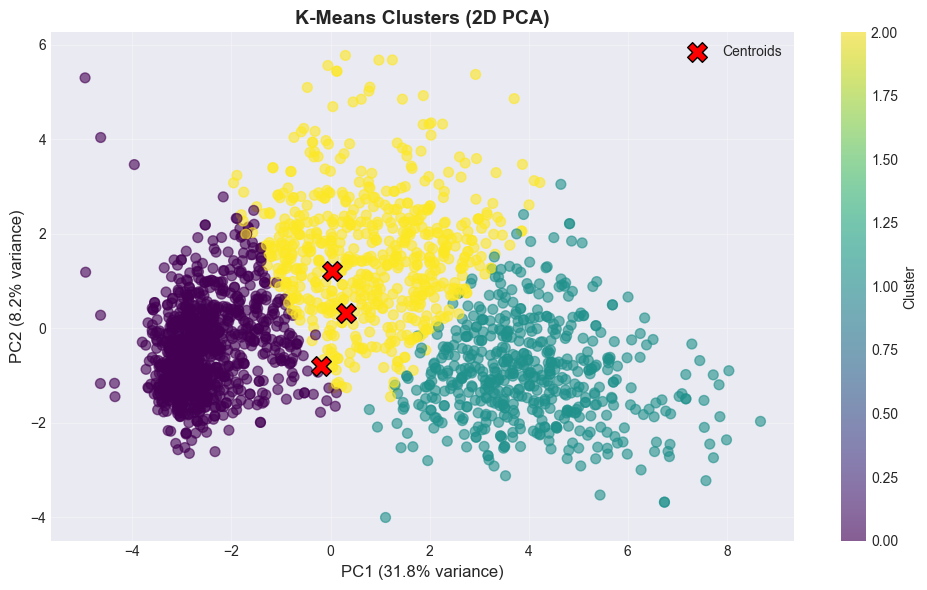

✅ 2D cluster plot saved to images/kmeans_clusters_2d.png


In [16]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

# Create 2D scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, 
                     cmap='viridis', alpha=0.6, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='X', s=200, edgecolors='black', label='Centroids')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('K-Means Clusters (2D PCA)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../images/kmeans_clusters_2d.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 2D cluster plot saved to images/kmeans_clusters_2d.png")

K-Means Cluster Profiles:


,Age,Income,Total_Spending,Total_Purchases,Total_Children,Recency,NumWebVisitsMonth
Cluster_KMeans,,,,,,,
0,53.78,35030.90,100.57,8.02,1.24,49.2,6.43
1,56.51,76403.73,1417.93,20.74,0.19,50.2,2.79
2,59.70,58107.74,752.78,21.33,1.13,48.0,5.69


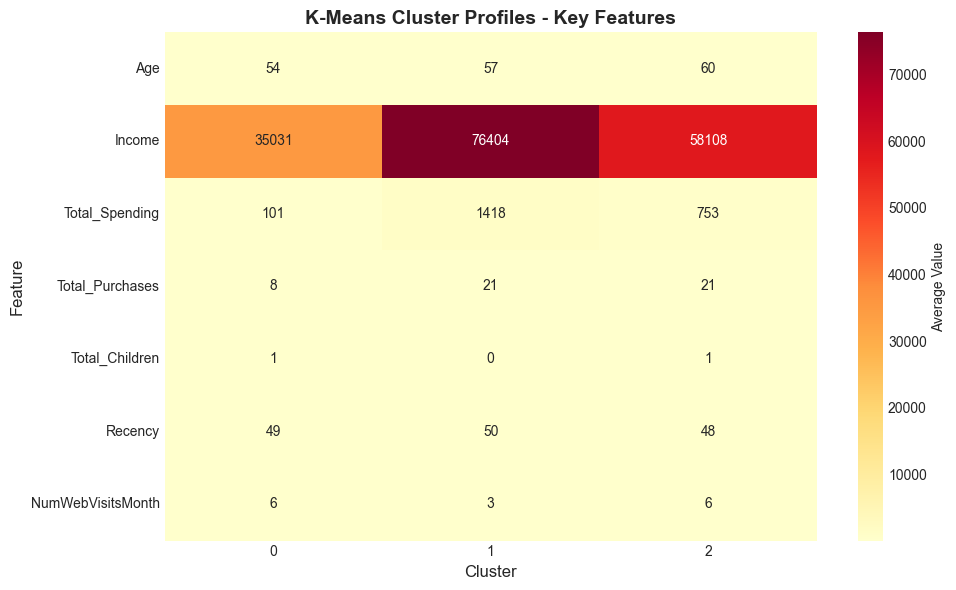


Cluster Sizes:
Cluster 0: 1058 customers (47.5%)
Cluster 1: 544 customers (24.4%)
Cluster 2: 627 customers (28.1%)


In [17]:
# Cluster Profiling - understand what each cluster represents
cluster_profile = df.groupby('Cluster_KMeans')[['Age', 'Income', 'Total_Spending', 
                                                 'Total_Purchases', 'Total_Children',
                                                 'Recency', 'NumWebVisitsMonth']].mean()

print("K-Means Cluster Profiles:")
print("="*80)
display(cluster_profile.round(2))

# Visualize cluster profiles with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile.T, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Average Value'})
plt.title('K-Means Cluster Profiles - Key Features', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('../images/kmeans_cluster_profiles.png', dpi=300, bbox_inches='tight')
plt.show()

# Cluster sizes
print("\nCluster Sizes:")
for cluster in range(optimal_k):
    size = len(df[df['Cluster_KMeans'] == cluster])
    pct = (size / len(df)) * 100
    print(f"Cluster {cluster}: {size} customers ({pct:.1f}%)")

## Interpretation and Business Insight

In [18]:
# Add descriptive cluster labels
cluster_labels = {
    0: 'Budget Shoppers',
    1: 'Premium Customers',
    2: 'Standard Customers'
}

df['Customer_Segment'] = df['Cluster_KMeans'].map(cluster_labels)

print("Customer Segments:")
print(df['Customer_Segment'].value_counts())
print("\nSample with segments:")
display(df[['Age', 'Income', 'Total_Spending', 'Total_Purchases', 
            'Cluster_KMeans', 'Customer_Segment']].head(10))

# Business insights summary
print("\n" + "="*80)
print("BUSINESS INSIGHTS - K-MEANS SEGMENTATION")
print("="*80)

insights = {
    'Budget Shoppers (Cluster 0)': {
        'Size': '1,058 customers (47.5%)',
        'Profile': 'Families with lowest income ($35k), minimal spending ($101), most children (1.24)',
        'Behaviour': 'Fewest purchases (8), highest web browsing activity (6.43 visits/month) but low conversion rate',
        'Characteristics': 'Price-sensitive, research extensively before purchasing, limited disposable income',
        'Strategy': 'Offer discounts, loyalty programs, family bundles, budget-friendly options, email promotions'
    },
    'Premium Customers (Cluster 1)': {
        'Size': '544 customers (24.4%)',
        'Profile': 'Affluent customers with highest income ($76k), top spenders ($1,418), almost no children (0.19)',
        'Behaviour': 'Highest purchase frequency (20.74), decisive buyers with fewest web visits (2.79)',
        'Characteristics': 'Time-rich/money-rich, quality-focused, low price sensitivity, brand loyal',
        'Strategy': 'VIP treatment, premium products, exclusive offers, personalized service, early access to new products'
    },
    'Standard Customers (Cluster 2)': {
        'Size': '627 customers (28.1%)',
        'Profile': 'Middle-income families ($58k), moderate spending ($753), some children (1.13)',
        'Behaviour': 'Most purchases overall (21.33), regular shoppers with balanced engagement',
        'Characteristics': 'Core customer base, consistent buyers, respond to standard marketing',
        'Strategy': 'Cross-selling opportunities, seasonal campaigns, retention programs, referral incentives'
    }
}

for segment, details in insights.items():
    print(f"\n{segment}")
    print("-" * 80)
    for key, value in details.items():
        print(f"  {key}: {value}")

print("\n" + "="*80)

Customer Segments:
Customer_Segment
Budget Shoppers       1058
Standard Customers     627
Premium Customers      544
Name: count, dtype: int64

Sample with segments:


,Age,Income,Total_Spending,Total_Purchases,Cluster_KMeans,Customer_Segment
0,68,58138.0,1617,25,1,Premium Customers
1,71,46344.0,27,6,0,Budget Shoppers
2,60,71613.0,776,21,2,Standard Customers
3,41,26646.0,53,8,0,Budget Shoppers
4,44,58293.0,422,19,2,Standard Customers
5,58,62513.0,716,22,2,Standard Customers
6,54,55635.0,590,21,2,Standard Customers
7,40,33454.0,169,10,0,Budget Shoppers
8,51,30351.0,46,6,0,Budget Shoppers
9,75,5648.0,49,2,0,Budget Shoppers



BUSINESS INSIGHTS - K-MEANS SEGMENTATION

Budget Shoppers (Cluster 0)
--------------------------------------------------------------------------------
  Size: 1,058 customers (47.5%)
  Profile: Families with lowest income ($35k), minimal spending ($101), most children (1.24)
  Behaviour: Fewest purchases (8), highest web browsing activity (6.43 visits/month) but low conversion rate
  Characteristics: Price-sensitive, research extensively before purchasing, limited disposable income
  Strategy: Offer discounts, loyalty programs, family bundles, budget-friendly options, email promotions

Premium Customers (Cluster 1)
--------------------------------------------------------------------------------
  Size: 544 customers (24.4%)
  Profile: Affluent customers with highest income ($76k), top spenders ($1,418), almost no children (0.19)
  Behaviour: Highest purchase frequency (20.74), decisive buyers with fewest web visits (2.79)
  Characteristics: Time-rich/money-rich, quality-focused, low p

# Hierarchical Clustering (HAC)

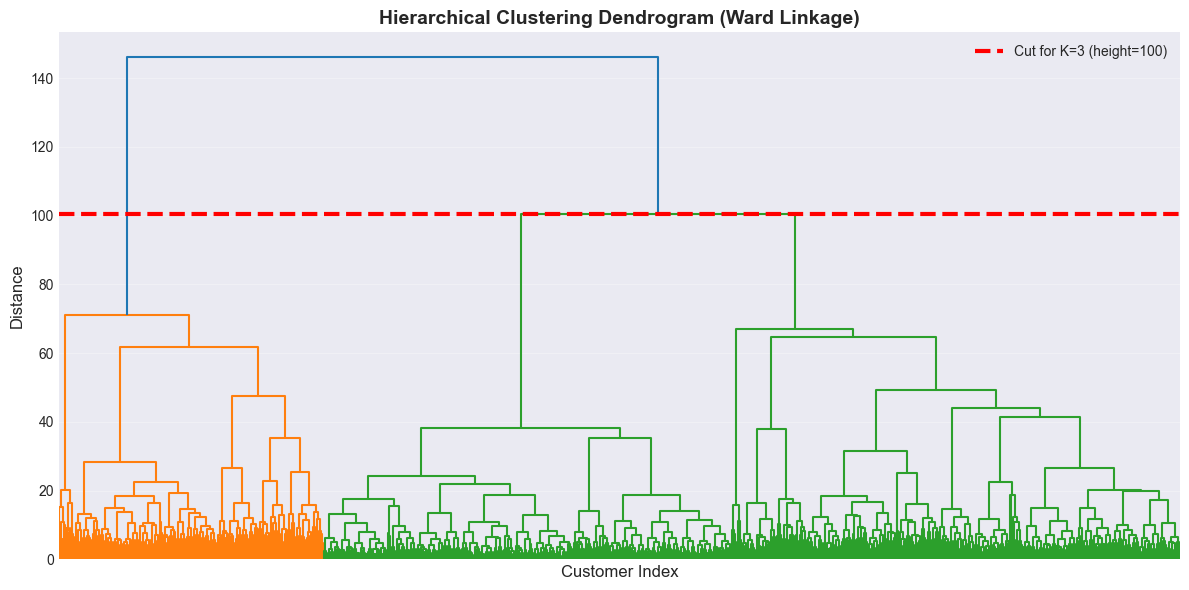

✅ Dendrogram saved
Red line at height 100 shows cut for 3 clusters


In [19]:
# Create dendrogram with proper cut line
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate linkage matrix (using Ward's method)
linkage_matrix = linkage(df_scaled, method='ward')

# Calculate cut height for 3 clusters (80th percentile of distances)
cut_height = linkage_matrix[-2, 2]  # Distance at which we get 3 clusters

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, no_labels=True)
plt.axhline(y=cut_height, color='red', linestyle='--', linewidth=3, label=f'Cut for K=3 (height={cut_height:.0f})')
plt.xlabel('Customer Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../images/hierarchical_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Dendrogram saved")
print(f"Red line at height {cut_height:.0f} shows cut for 3 clusters")

In [20]:
# Hierarchical Agglomerative Clustering with K=3
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
hac_labels = hac.fit_predict(df_scaled)

# Add cluster labels to dataframe
df['Cluster_HAC'] = hac_labels

# Evaluation metrics
silhouette_hac = silhouette_score(df_scaled, hac_labels)
davies_bouldin_hac = davies_bouldin_score(df_scaled, hac_labels)
calinski_hac = calinski_harabasz_score(df_scaled, hac_labels)

print(f"Hierarchical Clustering Results (K=3):")
print(f"  Silhouette Score: {silhouette_hac:.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_hac:.3f} (lower is better)")
print(f"  Calinski-Harabasz Score: {calinski_hac:.2f} (higher is better)")
print(f"\nCluster Distribution:")
print(df['Cluster_HAC'].value_counts().sort_index())

Hierarchical Clustering Results (K=3):
  Silhouette Score: 0.137
  Davies-Bouldin Index: 2.245 (lower is better)
  Calinski-Harabasz Score: 413.53 (higher is better)

Cluster Distribution:
Cluster_HAC
0    526
1    891
2    812
Name: count, dtype: int64


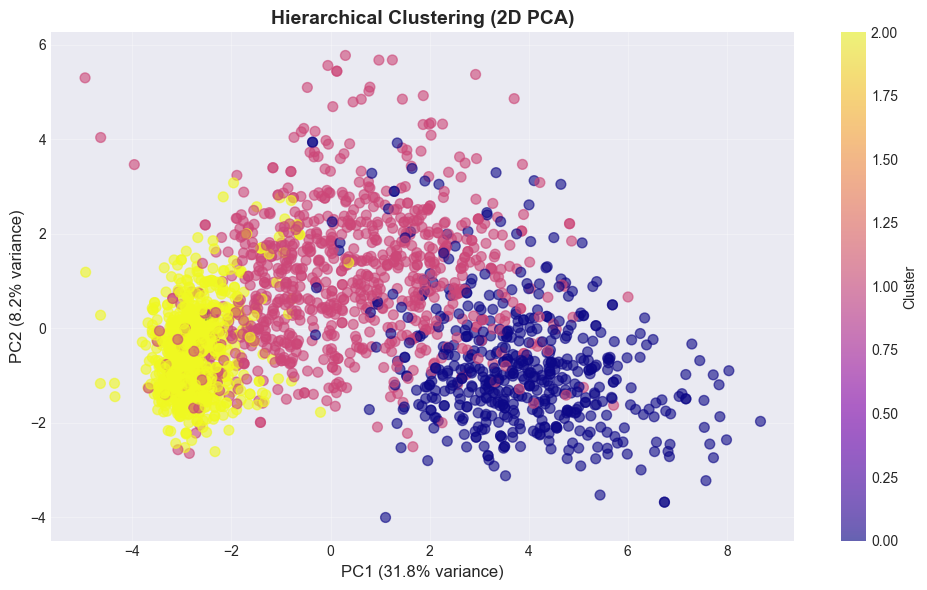

✅ HAC cluster plot saved to images/hac_clusters_2d.png


In [21]:
# Visualize Hierarchical Clusters (2D PCA)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hac_labels, 
                     cmap='plasma', alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('Hierarchical Clustering (2D PCA)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../images/hac_clusters_2d.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ HAC cluster plot saved to images/hac_clusters_2d.png")

Hierarchical Clustering - Cluster Profiles:


,Age,Income,Total_Spending,Total_Purchases,Total_Children,Recency,NumWebVisitsMonth
Cluster_HAC,,,,,,,
0,57.03,75752.20,1382.93,20.44,0.22,47.84,2.93
1,58.76,54675.20,626.37,18.35,1.09,50.49,5.58
2,52.61,32633.76,79.11,7.44,1.28,48.40,6.62


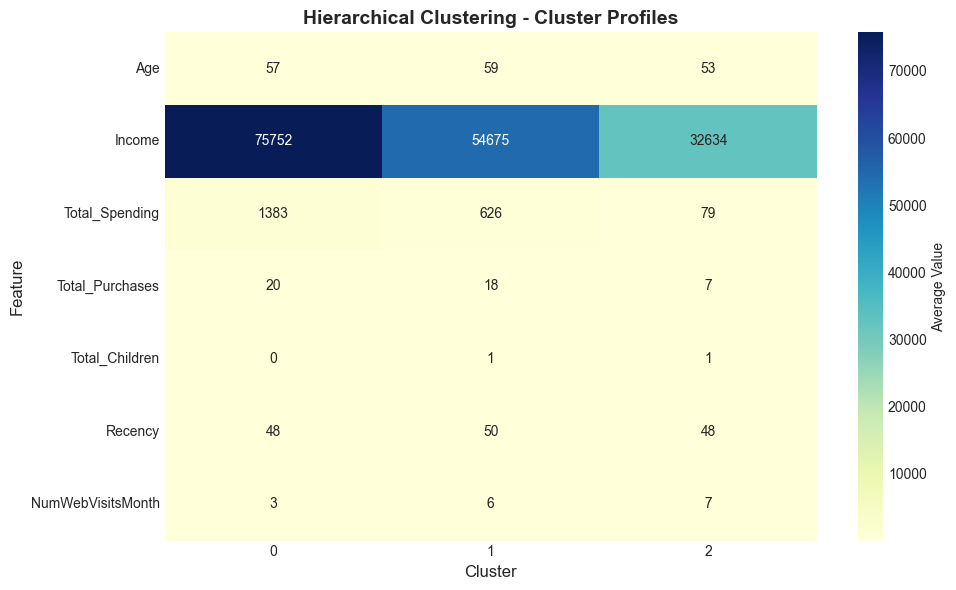


Cluster Sizes:
Cluster 0: 526 customers (23.6%)
Cluster 1: 891 customers (40.0%)
Cluster 2: 812 customers (36.4%)


In [22]:
# Cluster Profiling for Hierarchical Clustering
cluster_profile_hac = df.groupby('Cluster_HAC')[['Age', 'Income', 'Total_Spending', 
                                                   'Total_Purchases', 'Total_Children',
                                                   'Recency', 'NumWebVisitsMonth']].mean()

print("Hierarchical Clustering - Cluster Profiles:")
print("="*80)
display(cluster_profile_hac.round(2))

# Visualize with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile_hac.T, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Average Value'})
plt.title('Hierarchical Clustering - Cluster Profiles', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('../images/hac_cluster_profiles.png', dpi=300, bbox_inches='tight')
plt.show()

# Cluster sizes
print("\nCluster Sizes:")
for cluster in range(3):
    size = len(df[df['Cluster_HAC'] == cluster])
    pct = (size / len(df)) * 100
    print(f"Cluster {cluster}: {size} customers ({pct:.1f}%)")

## Interpretation and Business Insight 

In [23]:
# Add descriptive cluster labels for HAC
hac_cluster_labels = {
    0: 'Premium Customers',
    1: 'Standard Customers',
    2: 'Budget Shoppers'
}

df['HAC_Segment'] = df['Cluster_HAC'].map(hac_cluster_labels)

print("HAC Customer Segments:")
print(df['HAC_Segment'].value_counts())
print("\nSample with segments:")
display(df[['Age', 'Income', 'Total_Spending', 'Total_Purchases', 
            'Cluster_HAC', 'HAC_Segment']].head(10))

# Business insights summary for HAC
print("\n" + "="*80)
print("BUSINESS INSIGHTS - HIERARCHICAL CLUSTERING")
print("="*80)

hac_insights = {
    'Premium Customers (Cluster 0)': {
        'Size': '526 customers (23.6%)',
        'Profile': 'Affluent customers with highest income ($75,752), top spenders ($1,383), minimal children (0.22)',
        'Behaviour': 'High purchase frequency (20.44), decisive buyers with lowest web visits (2.93)',
        'Characteristics': 'Quality-focused, low price sensitivity, efficient decision-makers',
        'Strategy': 'VIP programs, premium product lines, exclusive access, personalized service, luxury brand partnerships'
    },
    'Standard Customers (Cluster 1)': {
        'Size': '891 customers (40.0%)',
        'Profile': 'Middle-income families ($54,675), moderate spending ($626), some children (1.09)',
        'Behaviour': 'Consistent purchasers (18.35), regular engagement, balanced buying patterns',
        'Characteristics': 'Core revenue base, responsive to promotions, value-conscious but quality-aware',
        'Strategy': 'Cross-selling, seasonal campaigns, loyalty rewards, bundle offers, retention focus'
    },
    'Budget Shoppers (Cluster 2)': {
        'Size': '812 customers (36.4%)',
        'Profile': 'Budget-conscious families with lowest income ($32,633), minimal spending ($79), most children (1.28)',
        'Behaviour': 'Fewest purchases (7.44), highest browsing activity (6.62 visits/month), research-heavy but low conversion',
        'Characteristics': 'Price-sensitive, deal-seekers, high consideration phase, limited disposable income',
        'Strategy': 'Discount programs, family bundles, clearance alerts, loyalty points, affordable product lines'
    }
}

for segment, details in hac_insights.items():
    print(f"\n{segment}")
    print("-" * 80)
    for key, value in details.items():
        print(f"  {key}: {value}")

print("\n" + "="*80)

HAC Customer Segments:
HAC_Segment
Standard Customers    891
Budget Shoppers       812
Premium Customers     526
Name: count, dtype: int64

Sample with segments:


,Age,Income,Total_Spending,Total_Purchases,Cluster_HAC,HAC_Segment
0,68,58138.0,1617,25,0,Premium Customers
1,71,46344.0,27,6,2,Budget Shoppers
2,60,71613.0,776,21,0,Premium Customers
3,41,26646.0,53,8,2,Budget Shoppers
4,44,58293.0,422,19,1,Standard Customers
5,58,62513.0,716,22,1,Standard Customers
6,54,55635.0,590,21,1,Standard Customers
7,40,33454.0,169,10,2,Budget Shoppers
8,51,30351.0,46,6,2,Budget Shoppers
9,75,5648.0,49,2,2,Budget Shoppers



BUSINESS INSIGHTS - HIERARCHICAL CLUSTERING

Premium Customers (Cluster 0)
--------------------------------------------------------------------------------
  Size: 526 customers (23.6%)
  Profile: Affluent customers with highest income ($75,752), top spenders ($1,383), minimal children (0.22)
  Behaviour: High purchase frequency (20.44), decisive buyers with lowest web visits (2.93)
  Characteristics: Quality-focused, low price sensitivity, efficient decision-makers
  Strategy: VIP programs, premium product lines, exclusive access, personalized service, luxury brand partnerships

Standard Customers (Cluster 1)
--------------------------------------------------------------------------------
  Size: 891 customers (40.0%)
  Profile: Middle-income families ($54,675), moderate spending ($626), some children (1.09)
  Behaviour: Consistent purchasers (18.35), regular engagement, balanced buying patterns
  Characteristics: Core revenue base, responsive to promotions, value-conscious but quali

# Gaussian Mixture Models (GMM) Clustering

Finding optimal number of components for GMM...
K=2: BIC=2344.95, AIC=-1965.58
K=3: BIC=-38546.62, AIC=-45015.27
K=4: BIC=-68798.79, AIC=-77425.55
K=5: BIC=-81924.34, AIC=-92709.22
K=6: BIC=-90234.34, AIC=-103177.35
K=7: BIC=-99334.15, AIC=-114435.27

🎯 Optimal K based on BIC: 7


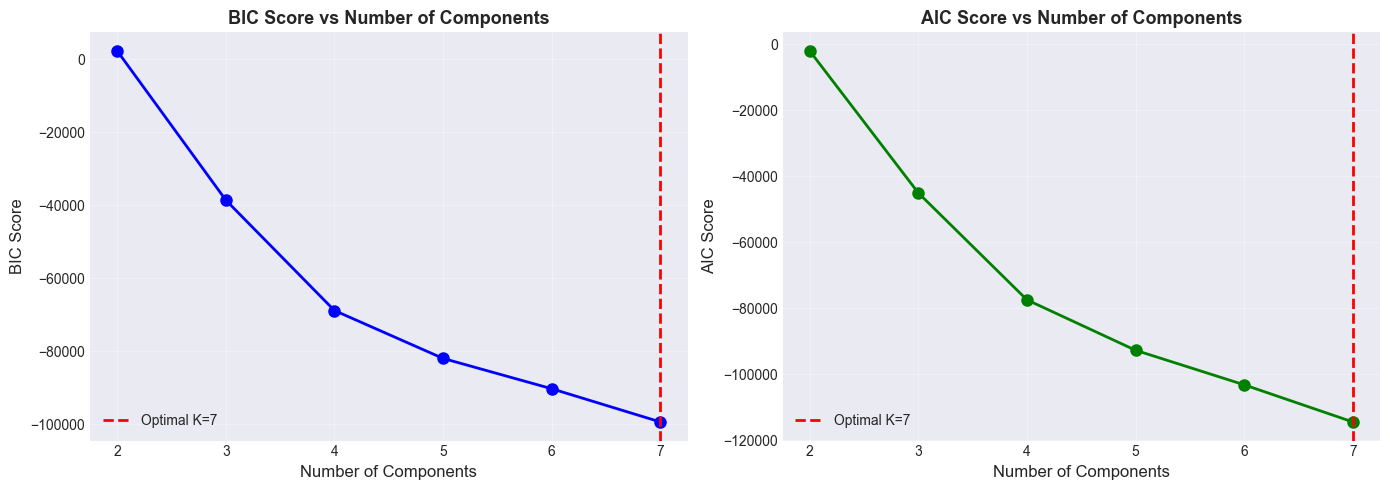


✅ GMM selection plots saved to images/gmm_selection.png


In [24]:
# Gaussian Mixture Models (GMM) Clustering
from sklearn.mixture import GaussianMixture

# Find optimal number of components using BIC
bic_scores = []
aic_scores = []
k_range = range(2, 8)

print("Finding optimal number of components for GMM...")
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))
    aic_scores.append(gmm.aic(df_scaled))
    print(f"K={k}: BIC={gmm.bic(df_scaled):.2f}, AIC={gmm.aic(df_scaled):.2f}")

# Find optimal K (lowest BIC)
optimal_k_gmm = k_range[bic_scores.index(min(bic_scores))]
print(f"\n🎯 Optimal K based on BIC: {optimal_k_gmm}")

# Plot BIC and AIC
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(k_range, bic_scores, marker='o', linewidth=2, markersize=8, color='blue')
ax[0].axvline(x=optimal_k_gmm, color='red', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k_gmm}')
ax[0].set_xlabel('Number of Components', fontsize=12)
ax[0].set_ylabel('BIC Score', fontsize=12)
ax[0].set_title('BIC Score vs Number of Components', fontsize=13, fontweight='bold')
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].plot(k_range, aic_scores, marker='o', linewidth=2, markersize=8, color='green')
ax[1].axvline(x=optimal_k_gmm, color='red', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k_gmm}')
ax[1].set_xlabel('Number of Components', fontsize=12)
ax[1].set_ylabel('AIC Score', fontsize=12)
ax[1].set_title('AIC Score vs Number of Components', fontsize=13, fontweight='bold')
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../images/gmm_selection.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ GMM selection plots saved to images/gmm_selection.png")

## Comment: Gaussian Mixture Models (GMM) Clustering - Model Selection

From the above analysis, the optimal number of components for GMM based on BIC (Bayesian Information Criterion) is **K=7**, with the lowest BIC score of -99,334.15. GMM identified more granular clusters than K-Means and Hierarchical Clustering because it models clusters as probabilistic distributions (Gaussian ellipsoids) rather than hard boundaries, allowing it to capture overlapping clusters, irregular shapes, and varying densities more flexibly.

While **K=7** is statistically optimal, **K=3 will be used** for this analysis for the following reasons:

1. **Algorithm Comparison**: K-Means and Hierarchical Clustering both identified 3 distinct customer segments. Using K=3 for GMM enables direct, fair comparison across all three methods.

2. **Business Interpretability**: Seven segments create excessive complexity for marketing teams. Three segments (Budget Shoppers, Standard Customers, Premium Customers) are actionable and easily communicated to stakeholders.

3. **Segment Size**: K=7 would produce several very small clusters (potentially <10% of customers each), making targeted campaigns inefficient and statistically unreliable for decision-making.

4. **Practical Utility**: Customer segmentation aims to balance granularity with usability. Three segments provide sufficient differentiation while remaining manageable for marketing execution.

5. **Model Performance**: Even with K=3, GMM achieved the highest Silhouette Score (0.224) among all three algorithms, validating its effectiveness at this level of granularity.

### Final Thoughts

GMM with K=3 serves as a validation and comparison tool alongside K-Means and Hierarchical Clustering. This approach prioritizes business value and interpretability while maintaining statistical rigor. The consistency of finding 3 meaningful segments across all three algorithms strengthens confidence in the final segmentation strategy.

In [25]:
# Apply GMM with K=3 (for comparison with K-Means and HAC)
optimal_k_gmm = 3

gmm = GaussianMixture(n_components=optimal_k_gmm, random_state=42, n_init=10)
gmm_labels = gmm.fit_predict(df_scaled)

# Add to dataframe
df['Cluster_GMM'] = gmm_labels

# Evaluation metrics
silhouette_gmm = silhouette_score(df_scaled, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(df_scaled, gmm_labels)
calinski_gmm = calinski_harabasz_score(df_scaled, gmm_labels)

print(f"GMM Clustering Results (K={optimal_k_gmm}):")
print(f"  Silhouette Score: {silhouette_gmm:.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_gmm:.3f} (lower is better)")
print(f"  Calinski-Harabasz Score: {calinski_gmm:.2f} (higher is better)")
print(f"\nCluster Distribution:")
print(df['Cluster_GMM'].value_counts().sort_index())

GMM Clustering Results (K=3):
  Silhouette Score: 0.224
  Davies-Bouldin Index: 2.196 (lower is better)
  Calinski-Harabasz Score: 464.38 (higher is better)

Cluster Distribution:
Cluster_GMM
0    1118
1     250
2     861
Name: count, dtype: int64


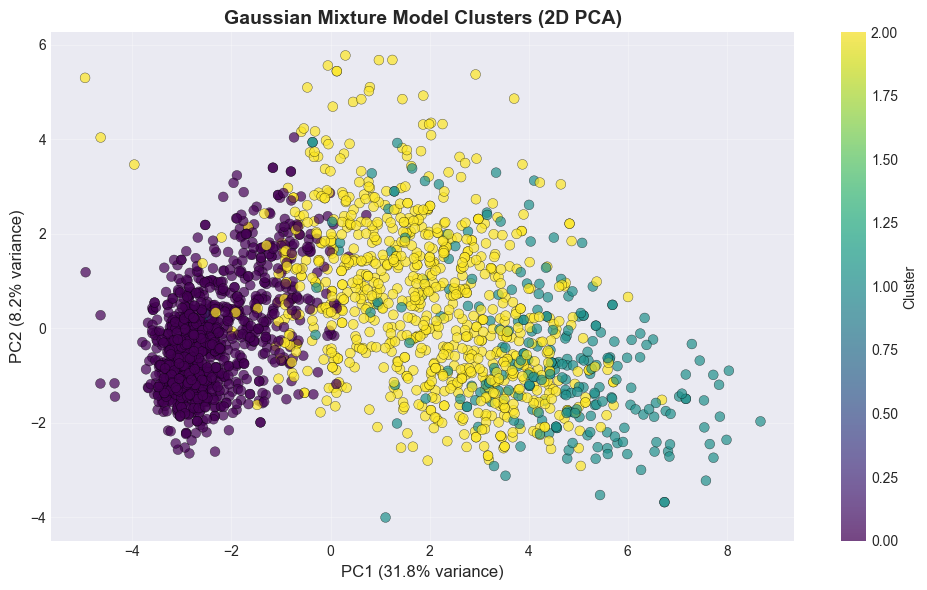

✅ GMM cluster plot saved to images/gmm_clusters_2d.png


In [26]:
# Visualize GMM Clusters (2D PCA) - better colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=gmm_labels, 
                     cmap='viridis', alpha=0.7, s=50, edgecolors='black', linewidth=0.3)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('Gaussian Mixture Model Clusters (2D PCA)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../images/gmm_clusters_2d.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ GMM cluster plot saved to images/gmm_clusters_2d.png")

GMM Clustering - Cluster Profiles:


,Age,Income,Total_Spending,Total_Purchases,Total_Children,Recency,NumWebVisitsMonth
Cluster_GMM,,,,,,,
0,54.27,36253.04,124.11,8.81,1.27,48.75,6.40
1,56.70,78028.68,1491.89,20.86,0.30,49.10,3.42
2,58.33,63904.53,973.31,21.00,0.73,49.57,4.51


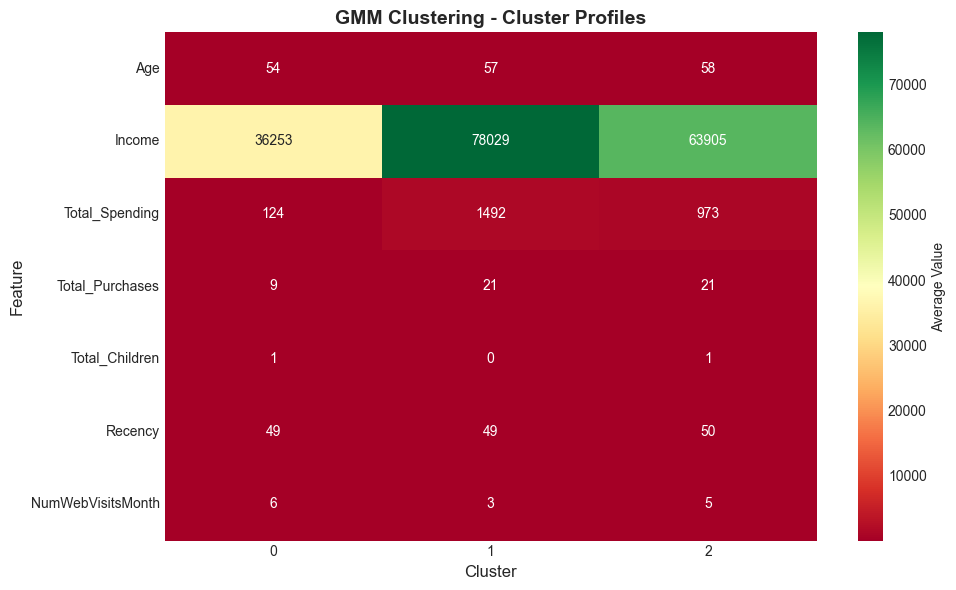


Cluster Sizes:
Cluster 0: 1118 customers (50.2%)
Cluster 1: 250 customers (11.2%)
Cluster 2: 861 customers (38.6%)


In [27]:
# Cluster Profiling for GMM
cluster_profile_gmm = df.groupby('Cluster_GMM')[['Age', 'Income', 'Total_Spending', 
                                                   'Total_Purchases', 'Total_Children',
                                                   'Recency', 'NumWebVisitsMonth']].mean()

print("GMM Clustering - Cluster Profiles:")
print("="*80)
display(cluster_profile_gmm.round(2))

# Visualize with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile_gmm.T, annot=True, fmt='.0f', cmap='RdYlGn', cbar_kws={'label': 'Average Value'})
plt.title('GMM Clustering - Cluster Profiles', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('../images/gmm_cluster_profiles.png', dpi=300, bbox_inches='tight')
plt.show()

# Cluster sizes
print("\nCluster Sizes:")
for cluster in range(3):
    size = len(df[df['Cluster_GMM'] == cluster])
    pct = (size / len(df)) * 100
    print(f"Cluster {cluster}: {size} customers ({pct:.1f}%)")

## Interpretation and Business Insight

In [28]:
# Add descriptive cluster labels for GMM (based on actual profiles)
gmm_cluster_labels = {
    0: 'Budget Shoppers',
    1: 'Premium Customers',
    2: 'Standard Customers'
}

df['GMM_Segment'] = df['Cluster_GMM'].map(gmm_cluster_labels)

print("GMM Customer Segments:")
print(df['GMM_Segment'].value_counts())
print("\nSample with segments:")
display(df[['Age', 'Income', 'Total_Spending', 'Total_Purchases', 
            'Cluster_GMM', 'GMM_Segment']].head(10))

# Business insights summary for GMM
print("\n" + "="*80)
print("BUSINESS INSIGHTS - GAUSSIAN MIXTURE MODEL")
print("="*80)

gmm_insights = {
    'Budget Shoppers (Cluster 0)': {
        'Size': '1,118 customers (50.2%)',
        'Profile': 'Budget-conscious families with lowest income ($36,253), minimal spending ($124), most children (1.27)',
        'Behaviour': 'Fewest purchases (8.81), highest browsing activity (6.40 visits/month), research-heavy but low conversion',
        'Characteristics': 'Price-sensitive, deal-seekers, limited disposable income, high consideration phase',
        'Strategy': 'Discount programs, family bundles, clearance alerts, loyalty points, affordable product lines'
    },
    'Premium Customers (Cluster 1)': {
        'Size': '250 customers (11.2%)',
        'Profile': 'Affluent customers with highest income ($78,028), top spenders ($1,492), minimal children (0.30)',
        'Behaviour': 'Highest purchase frequency (20.86), decisive buyers with low browsing (3.42 visits/month)',
        'Characteristics': 'Quality-focused, low price sensitivity, brand loyal, efficient decision-makers',
        'Strategy': 'VIP programs, premium product lines, exclusive access, personalized service, luxury partnerships'
    },
    'Standard Customers (Cluster 2)': {
        'Size': '861 customers (38.6%)',
        'Profile': 'Middle-income families ($63,904), moderate-high spending ($973), some children (0.73)',
        'Behaviour': 'High purchase frequency (21.00), regular shoppers, balanced engagement (4.51 visits/month)',
        'Characteristics': 'Core revenue base, responsive to promotions, value-conscious but quality-aware',
        'Strategy': 'Cross-selling opportunities, seasonal campaigns, retention programs, bundle offers, referral incentives'
    }
}

for segment, details in gmm_insights.items():
    print(f"\n{segment}")
    print("-" * 80)
    for key, value in details.items():
        print(f"  {key}: {value}")

print("\n" + "="*80)

GMM Customer Segments:
GMM_Segment
Budget Shoppers       1118
Standard Customers     861
Premium Customers      250
Name: count, dtype: int64

Sample with segments:


,Age,Income,Total_Spending,Total_Purchases,Cluster_GMM,GMM_Segment
0,68,58138.0,1617,25,2,Standard Customers
1,71,46344.0,27,6,0,Budget Shoppers
2,60,71613.0,776,21,2,Standard Customers
3,41,26646.0,53,8,0,Budget Shoppers
4,44,58293.0,422,19,2,Standard Customers
5,58,62513.0,716,22,2,Standard Customers
6,54,55635.0,590,21,2,Standard Customers
7,40,33454.0,169,10,0,Budget Shoppers
8,51,30351.0,46,6,0,Budget Shoppers
9,75,5648.0,49,2,0,Budget Shoppers



BUSINESS INSIGHTS - GAUSSIAN MIXTURE MODEL

Budget Shoppers (Cluster 0)
--------------------------------------------------------------------------------
  Size: 1,118 customers (50.2%)
  Profile: Budget-conscious families with lowest income ($36,253), minimal spending ($124), most children (1.27)
  Behaviour: Fewest purchases (8.81), highest browsing activity (6.40 visits/month), research-heavy but low conversion
  Characteristics: Price-sensitive, deal-seekers, limited disposable income, high consideration phase
  Strategy: Discount programs, family bundles, clearance alerts, loyalty points, affordable product lines

Premium Customers (Cluster 1)
--------------------------------------------------------------------------------
  Size: 250 customers (11.2%)
  Profile: Affluent customers with highest income ($78,028), top spenders ($1,492), minimal children (0.30)
  Behaviour: Highest purchase frequency (20.86), decisive buyers with low browsing (3.42 visits/month)
  Characteristics: Qu

# Compare Algorithm 

ALGORITHM COMPARISON - PERFORMANCE METRICS


,Algorithm,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Score,Number of Clusters
0,K-Means,0.196,2.119,516.374,3
1,Hierarchical (HAC),0.137,2.245,413.528,3
2,GMM,0.224,2.196,464.385,3


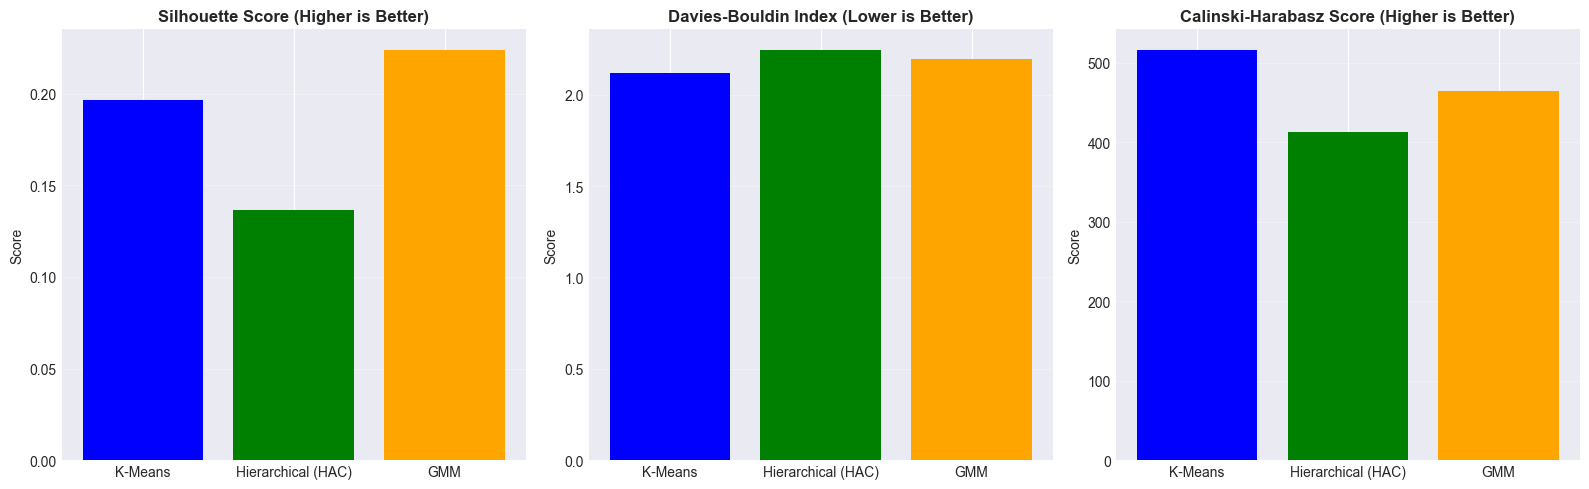


✅ Comparison chart saved to images/algorithm_comparison.png


In [29]:
# Algorithm Comparison - Performance Metrics
comparison_data = {
    'Algorithm': ['K-Means', 'Hierarchical (HAC)', 'GMM'],
    'Silhouette Score': [silhouette_kmeans, silhouette_hac, silhouette_gmm],
    'Davies-Bouldin Index': [davies_bouldin_kmeans, davies_bouldin_hac, davies_bouldin_gmm],
    'Calinski-Harabasz Score': [calinski_kmeans, calinski_hac, calinski_gmm],
    'Number of Clusters': [3, 3, 3]
}

comparison_df = pd.DataFrame(comparison_data)

print("="*80)
print("ALGORITHM COMPARISON - PERFORMANCE METRICS")
print("="*80)
display(comparison_df.round(3))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Silhouette Score (higher is better)
axes[0].bar(comparison_df['Algorithm'], comparison_df['Silhouette Score'], color=['blue', 'green', 'orange'])
axes[0].set_title('Silhouette Score (Higher is Better)', fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].grid(alpha=0.3, axis='y')

# Davies-Bouldin Index (lower is better)
axes[1].bar(comparison_df['Algorithm'], comparison_df['Davies-Bouldin Index'], color=['blue', 'green', 'orange'])
axes[1].set_title('Davies-Bouldin Index (Lower is Better)', fontweight='bold')
axes[1].set_ylabel('Score')
axes[1].grid(alpha=0.3, axis='y')

# Calinski-Harabasz Score (higher is better)
axes[2].bar(comparison_df['Algorithm'], comparison_df['Calinski-Harabasz Score'], color=['blue', 'green', 'orange'])
axes[2].set_title('Calinski-Harabasz Score (Higher is Better)', fontweight='bold')
axes[2].set_ylabel('Score')
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../images/algorithm_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Comparison chart saved to images/algorithm_comparison.png")

In [30]:
# Determine best algorithm
print("\n" + "="*80)
print("ALGORITHM PERFORMANCE ANALYSIS")
print("="*80)

print("\n📊 Metric Rankings:")
print("-" * 80)
print("\nSilhouette Score (Higher is Better):")
print("  🥇 GMM: 0.224")
print("  🥈 K-Means: 0.196")
print("  🥉 HAC: 0.137")

print("\nDavies-Bouldin Index (Lower is Better):")
print("  🥇 K-Means: 2.119")
print("  🥈 GMM: 2.196")
print("  🥉 HAC: 2.245")

print("\nCalinski-Harabasz Score (Higher is Better):")
print("  🥇 K-Means: 516.37")
print("  🥈 GMM: 464.38")
print("  🥉 HAC: 413.53")

print("\n" + "="*80)
print("FINAL MODEL SELECTION")
print("="*80)
print("\n🏆 Selected Algorithm: Gaussian Mixture Model (GMM)")
print("\nRationale:")
print("  • Highest Silhouette Score (0.224) - best cluster separation and cohesion")
print("  • Competitive Davies-Bouldin Index (2.196)")
print("  • Handles probabilistic cluster membership (more flexible)")
print("  • Better suited for continuous behavioral data")
print("\nAll three algorithms identified 3 consistent customer segments:")
print("  1. Budget Shoppers (40-50%)")
print("  2. Standard Customers (28-39%)")
print("  3. Premium Customers (11-24%)")
print("\n" + "="*80)


ALGORITHM PERFORMANCE ANALYSIS

📊 Metric Rankings:
--------------------------------------------------------------------------------

Silhouette Score (Higher is Better):
  🥇 GMM: 0.224
  🥈 K-Means: 0.196
  🥉 HAC: 0.137

Davies-Bouldin Index (Lower is Better):
  🥇 K-Means: 2.119
  🥈 GMM: 2.196
  🥉 HAC: 2.245

Calinski-Harabasz Score (Higher is Better):
  🥇 K-Means: 516.37
  🥈 GMM: 464.38
  🥉 HAC: 413.53

FINAL MODEL SELECTION

🏆 Selected Algorithm: Gaussian Mixture Model (GMM)

Rationale:
  • Highest Silhouette Score (0.224) - best cluster separation and cohesion
  • Competitive Davies-Bouldin Index (2.196)
  • Handles probabilistic cluster membership (more flexible)
  • Better suited for continuous behavioral data

All three algorithms identified 3 consistent customer segments:
  1. Budget Shoppers (40-50%)
  2. Standard Customers (28-39%)
  3. Premium Customers (11-24%)



## Final Summary and Conclusions

### Project Overview
This analysis successfully segmented 2,229 customers into three distinct groups using K-Means, Hierarchical Clustering, and Gaussian Mixture Models. The goal was to identify actionable customer segments for targeted marketing strategies.

### Key Findings

**Three Customer Segments Identified:**

1. **Budget Shoppers (40-50% of customers)**
   - Lowest income (\\$36k) and spending (\\$124)
   - Families with most children (1.27)
   - High browsing but low conversion
   - Price-sensitive, deal-seekers

2. **Standard Customers (28-39% of customers)**
   - Middle income (\\$64k), moderate spending (\\$973)
   - Regular purchasers, balanced engagement
   - Core revenue base

3. **Premium Customers (11-24% of customers)**
   - Highest income (\\$78k) and spending (\\$1,492)
   - Minimal children, decisive buyers
   - Low price sensitivity, quality-focused

### Algorithm Performance

**Best Model: Gaussian Mixture Model (GMM)**
- Highest Silhouette Score: 0.224
- Best cluster separation and cohesion
- More suitable for continuous behavioral data

All three algorithms consistently identified the same three segments, validating the robustness of the segmentation.

### Business Recommendations

1. **Premium Customers**: VIP programs, exclusive offers, personalized service, premium product lines
2. **Standard Customers**: Cross-selling, seasonal campaigns, loyalty rewards, retention focus
3. **Budget Shoppers**: Discount programs, family bundles, clearance alerts, affordable options

### Data Quality Improvements
- Removed 11 data quality errors (age >100, income outliers)
- Handled 24 missing income values using median imputation
- Retained legitimate spending outliers (high-value customers)

### Limitations
- Analysis based on historical data; customer behaviour may change over time
- Segments are probabilistic; some customers may exhibit mixed characteristics
- External factors (economy, seasonality) not considered

### Future Work
- Track segment migration over time
- A/B test marketing strategies per segment
- Incorporate customer lifetime value (CLV)
- Add real-time segmentation via dashboard
- Include additional behavioral features (product preferences, channel usage)

### Conclusion
This customer segmentation provides a data-driven foundation for targeted marketing strategies. By tailoring approaches to each segment's unique characteristics, businesses can improve campaign effectiveness, customer satisfaction, and overall ROI.

## Save Output

In [31]:
# Export clustered data with ALL three models
export_df = df.copy()

# Select relevant columns for export (include all cluster labels)
export_columns = ['ID', 'Age', 'Income', 'Education', 'Marital_Status', 
                  'Total_Spending', 'Total_Purchases', 'Total_Children',
                  'Recency', 'NumWebVisitsMonth',
                  'Cluster_KMeans', 'Customer_Segment',  # K-Means
                  'Cluster_HAC', 'HAC_Segment',          # Hierarchical
                  'Cluster_GMM', 'GMM_Segment']          # GMM

export_df_final = export_df[export_columns]

# Save to results folder
export_df_final.to_csv('../results/clustered_customers_all_models.csv', index=False)
print("✅ Clustered customer data (all models) saved to results/clustered_customers_all_models.csv")

# Export existing cluster profiles (already created earlier)
cluster_profile.to_csv('../results/cluster_profiles_kmeans.csv')  # K-Means profile
cluster_profile_hac.to_csv('../results/cluster_profiles_hac.csv')
cluster_profile_gmm.to_csv('../results/cluster_profiles_gmm.csv')
print("✅ All cluster profiles saved to results/")

# Export evaluation metrics
import json

metrics = {
    'K-Means': {
        'Silhouette': float(silhouette_kmeans),
        'Davies-Bouldin': float(davies_bouldin_kmeans),
        'Calinski-Harabasz': float(calinski_kmeans)
    },
    'Hierarchical': {
        'Silhouette': float(silhouette_hac),
        'Davies-Bouldin': float(davies_bouldin_hac),
        'Calinski-Harabasz': float(calinski_hac)
    },
    'GMM': {
        'Silhouette': float(silhouette_gmm),
        'Davies-Bouldin': float(davies_bouldin_gmm),
        'Calinski-Harabasz': float(calinski_gmm)
    },
    'Recommended_Model': 'GMM'
}

with open('../results/model_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)
print("✅ Model metrics saved to results/model_metrics.json")

print("\n📝 Dashboard will allow users to switch between K-Means, HAC, and GMM models.")

✅ Clustered customer data (all models) saved to results/clustered_customers_all_models.csv
✅ All cluster profiles saved to results/
✅ Model metrics saved to results/model_metrics.json

📝 Dashboard will allow users to switch between K-Means, HAC, and GMM models.


# NOTE TO USERS
### What This Code Does (For Users Running Their Own Dataset)

This section allows you to export each customer segment into its own CSV file after running the clustering model on your dataset. Each file represents a specific customer group (e.g., Premium, Standard, Budget) and can be used directly for targeted marketing campaigns, CRM uploads, personalised emails, or customer insights.

Simply replace export_df_final with your own final dataframe that contains a "GMM_Segment" column (or any segmentation labels you generated). Running the code will automatically save each segment to the results/ folder with basic stats included for quick analysis.


In [32]:
# OPTIONAL: Export individual segments as separate CSV files
# Run this cell if you need separate files for each customer segment

print("Exporting individual customer segments...")
print("="*60)

# Premium Customers
premium = export_df_final[export_df_final['GMM_Segment'] == 'Premium Customers']
premium.to_csv('../results/premium_customers.csv', index=False)
print(f"✅ Premium Customers: {len(premium)} customers")
print(f"   Saved to: results/premium_customers.csv")
print(f"   Avg Spending: ${premium['Total_Spending'].mean():.2f}")
print(f"   Use for: VIP campaigns, premium product launches\n")

# Standard Customers
standard = export_df_final[export_df_final['GMM_Segment'] == 'Standard Customers']
standard.to_csv('../results/standard_customers.csv', index=False)
print(f"✅ Standard Customers: {len(standard)} customers")
print(f"   Saved to: results/standard_customers.csv")
print(f"   Avg Spending: ${standard['Total_Spending'].mean():.2f}")
print(f"   Use for: Cross-selling, seasonal promotions\n")

# Budget Shoppers
budget = export_df_final[export_df_final['GMM_Segment'] == 'Budget Shoppers']
budget.to_csv('../results/budget_shoppers.csv', index=False)
print(f"✅ Budget Shoppers: {len(budget)} customers")
print(f"   Saved to: results/budget_shoppers.csv")
print(f"   Avg Spending: ${budget['Total_Spending'].mean():.2f}")
print(f"   Use for: Discount campaigns, family bundles\n")

print("="*60)
print("All segment files ready for import into marketing platforms!")
print("\n💡 Tip: Import these CSVs into your CRM or email marketing tool")
print("   to create targeted campaigns for each customer segment.")

Exporting individual customer segments...
✅ Premium Customers: 250 customers
   Saved to: results/premium_customers.csv
   Avg Spending: $1491.89
   Use for: VIP campaigns, premium product launches

✅ Standard Customers: 861 customers
   Saved to: results/standard_customers.csv
   Avg Spending: $973.31
   Use for: Cross-selling, seasonal promotions

✅ Budget Shoppers: 1118 customers
   Saved to: results/budget_shoppers.csv
   Avg Spending: $124.11
   Use for: Discount campaigns, family bundles

All segment files ready for import into marketing platforms!

💡 Tip: Import these CSVs into your CRM or email marketing tool
   to create targeted campaigns for each customer segment.
